In [1]:
import os
import tensorflow as tf

from tensorflow import keras

from functions.augmentation import get_augmentation_layers
from functions.model_running import run_model
from functions.plotting import plot_single_output_history
from classifiers.joint_datasets_learning.models import \
    get_basic_model, \
    get_model_partly_frozen, \
    get_model_with_attention
WIDTH = 150
HEIGHT = 150

In [2]:
base_data1_dir = os.path.join(
    '..',
    '..',
    '..',
    'data_all')
train_data1_dir = os.path.join(base_data1_dir, 'training')
valid_data1_dir = os.path.join(base_data1_dir, 'validation')

train1_ds = keras.utils.image_dataset_from_directory(
    directory=train_data1_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))
valid1_ds = keras.utils.image_dataset_from_directory(
    directory=valid_data1_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(HEIGHT, WIDTH))

Found 21680 files belonging to 9 classes.
Found 9743 files belonging to 9 classes.


In [3]:
data_augmentation = get_augmentation_layers()
train1_ds = train1_ds\
    .cache()\
    .shuffle(1000)\
    .map(lambda x, y: (data_augmentation(x), y))\
    .prefetch(buffer_size=tf.data.AUTOTUNE)
valid1_ds = valid1_ds\
    .cache()\
    .prefetch(buffer_size=tf.data.AUTOTUNE)

In [4]:
num_classes = 9

In [ ]:
history0 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_basic_model(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', 'models', 'inception_resnet_data_all_v2_0_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_all_v2_0'),
    reduction_patience=10,
    stopping_patience=20)

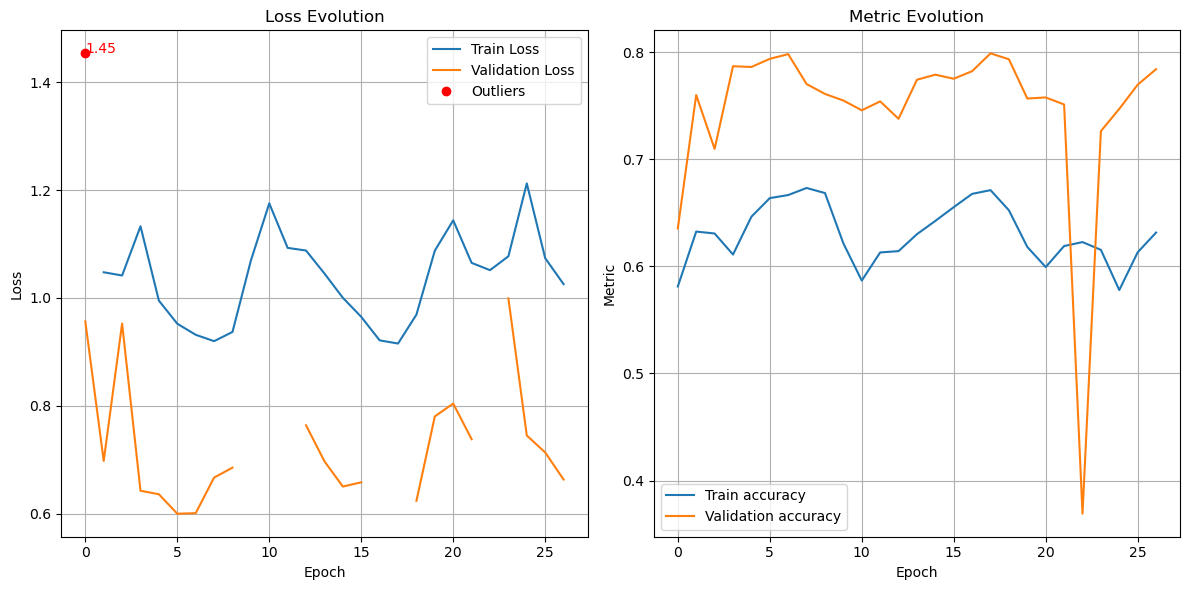

In [6]:
plot_single_output_history(history0.history)

In [ ]:
history1 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_model_partly_frozen(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', 'models', 'inception_resnet_data_all_v2_1_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_all_v2_1'),
    reduction_patience=10,
    stopping_patience=20)

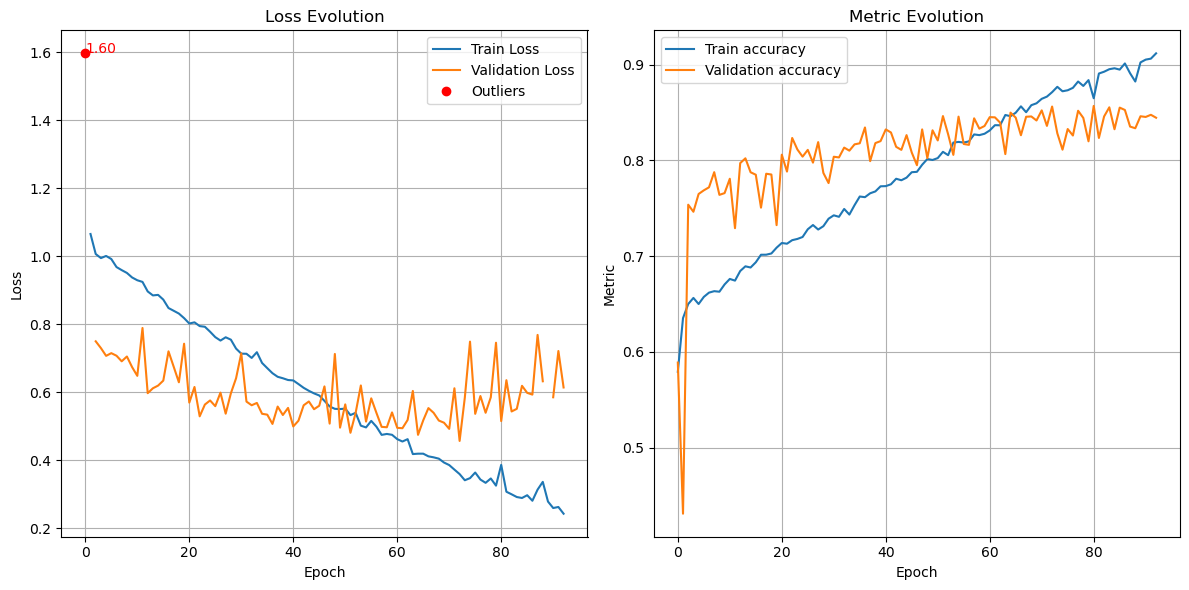

In [8]:
plot_single_output_history(history1.history)

In [ ]:
history2 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes),
    os.path.join('..', '..', 'models', 'inception_resnet_data_all_v2_2_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_all_v2_2'),
    reduction_patience=10,
    stopping_patience=20)

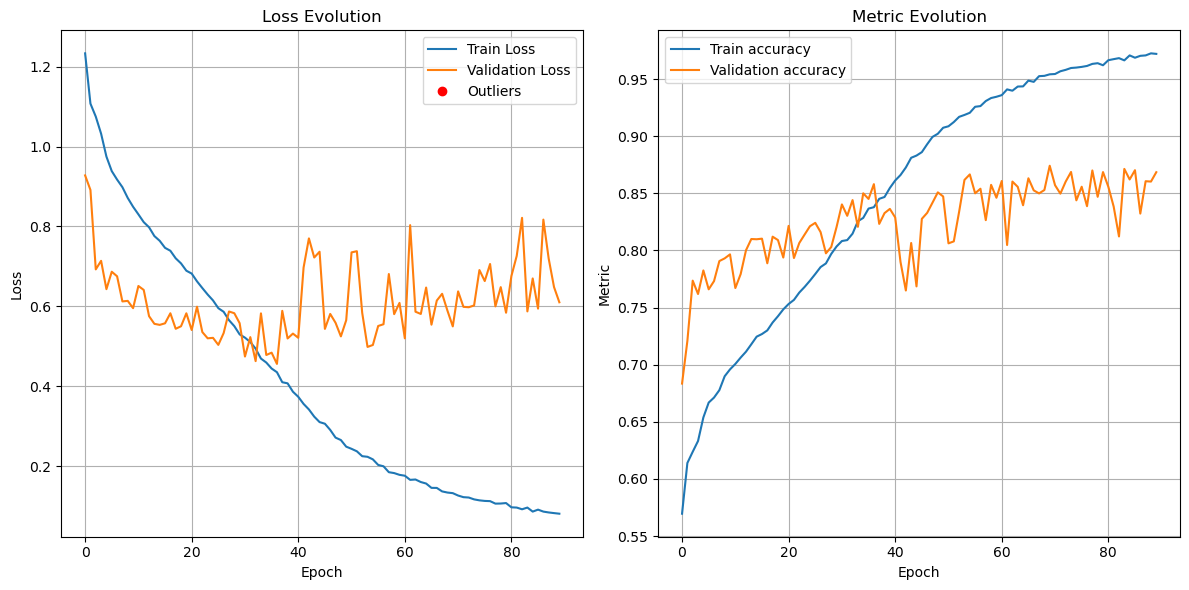

In [6]:
plot_single_output_history(history2.history)

In [ ]:
def freezer(base_model: keras.Model) -> None:
    for cnt in range(len(base_model.layers)):
        base_model.layers[cnt].trainable = False


history3 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, freezer),
    os.path.join('..', '..', 'models', 'inception_resnet_data_all_v2_3_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_all_v2_3'),
    reduction_patience=10,
    stopping_patience=20)

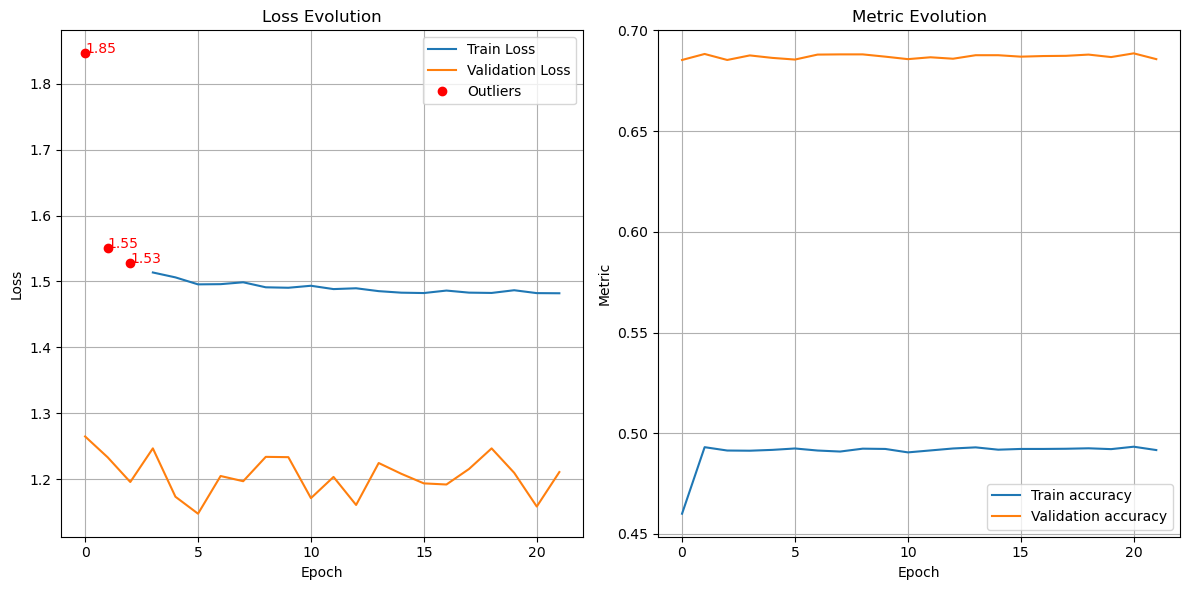

In [8]:
plot_single_output_history(history3.history)

In [ ]:
def first_half_freezer(base_model: keras.Model) -> None:
    for cnt in range(0, len(base_model.layers) // 2):
        base_model.layers[cnt].trainable = False


history4 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, first_half_freezer),
    os.path.join('..', '..', 'models', 'inception_resnet_data_all_v2_4_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_all_v2_4'),
    reduction_patience=10,
    stopping_patience=20)

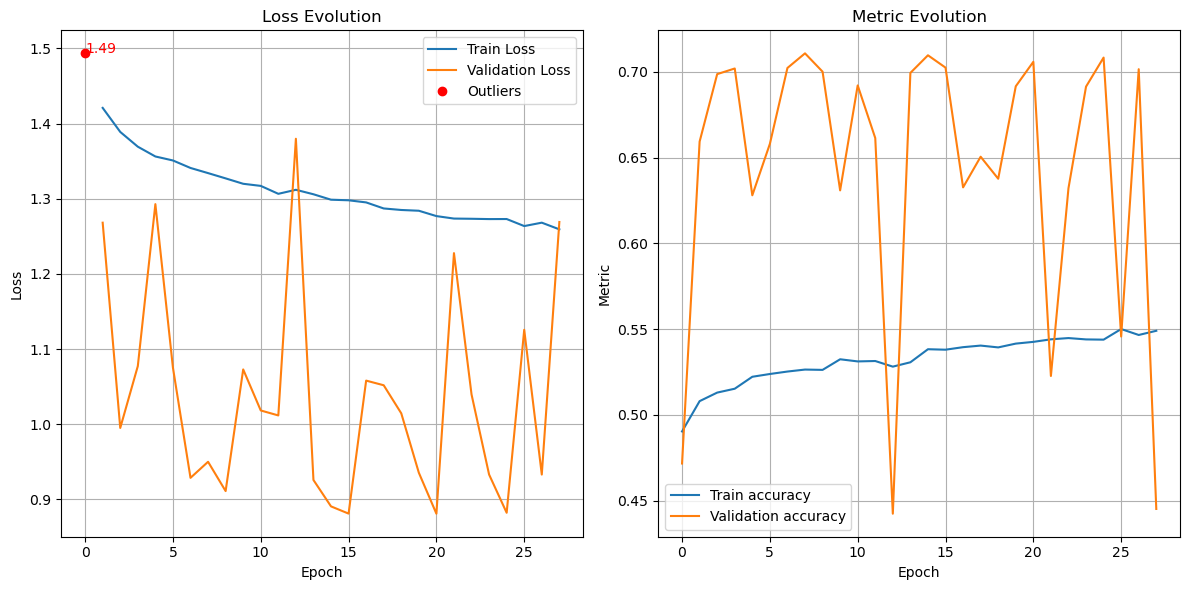

In [5]:
plot_single_output_history(history4.history)

In [ ]:
def second_half_freezer(base_model: keras.Model) -> None:
    for cnt in range(len(base_model.layers) // 2, len(base_model.layers)):
        base_model.layers[cnt].trainable = False


history5 = run_model(
    train1_ds,
    valid1_ds,
    lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, second_half_freezer),
    os.path.join('..', '..', 'models', 'inception_resnet_data_all_v2_5_{epoch}'),
    os.path.join('..', '..', 'tensor_logs', 'inception_resnet_data_all_v2_5'))

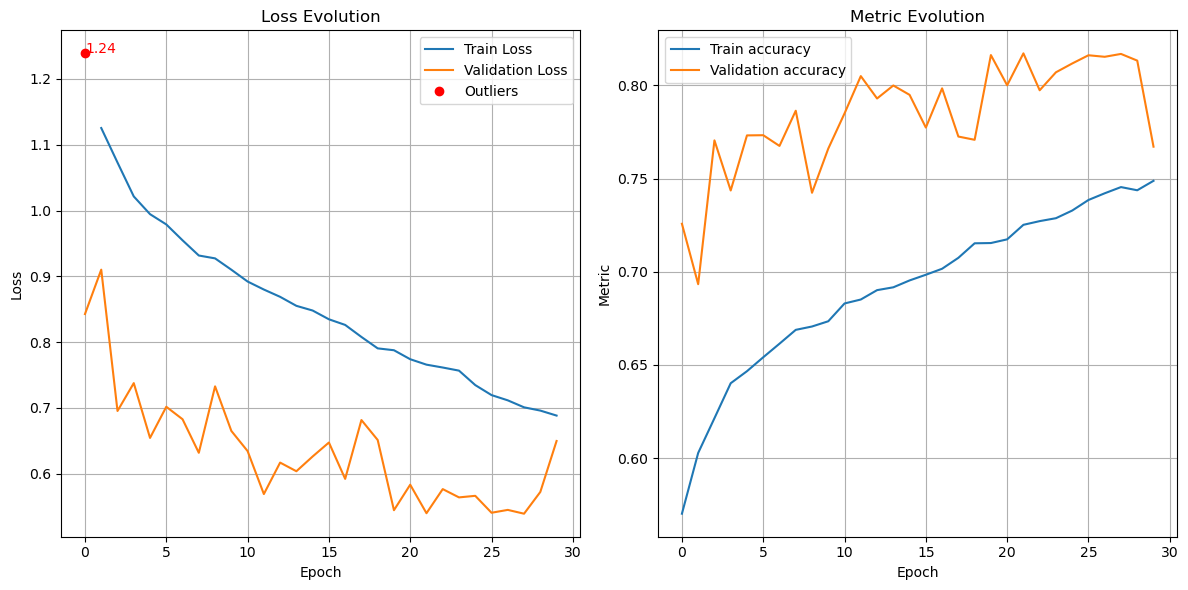

In [7]:
plot_single_output_history(history5.history)